# Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data

In [2]:
data = pd.read_csv("netflix.csv")

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data cleaning

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data.shape

(8807, 12)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.dropna(subset=['director','cast', 'country'], inplace=True)

In [9]:
data.shape

(5336, 12)

In [10]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [11]:
data['duration'] = data['duration'].fillna(data['duration'].mode()[0])

In [12]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip())
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [16]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object

# EDA

## Content Strategy

In [17]:
type_count = data['type'].value_counts()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/2822086694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(type_count,palette='pastel')


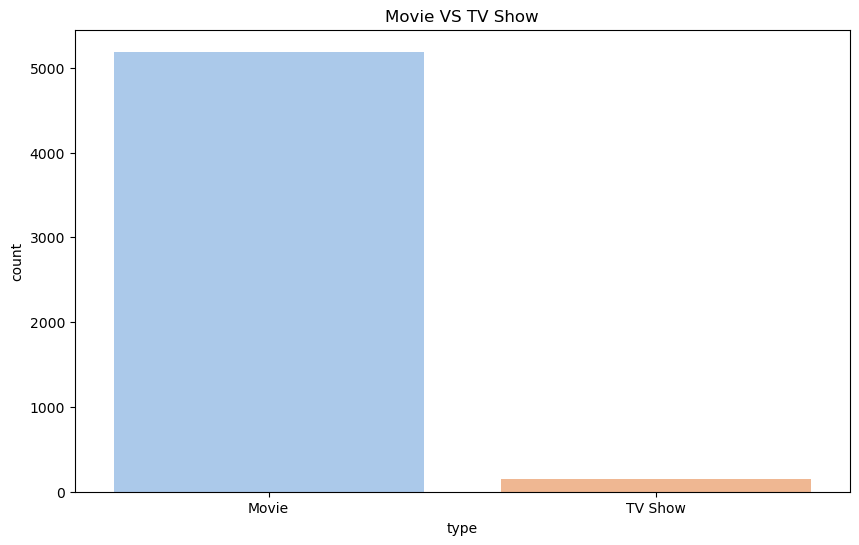

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(type_count,palette='pastel')
plt.title("Movie VS TV Show")
plt.show()

In [19]:
data['genres'] = data['listed_in'].str.split(', ')
data['genres']

0       [Dramas, Independent Movies, International Mov...
1                          [British TV Shows, Reality TV]
2                                      [Comedies, Dramas]
3                          [Dramas, International Movies]
4       [Comedies, International Movies, Romantic Movies]
                              ...                        
5331            [Dramas, International Movies, Thrillers]
5332                     [Cult Movies, Dramas, Thrillers]
5333                            [Comedies, Horror Movies]
5334                 [Children & Family Movies, Comedies]
5335     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 5336, dtype: object

In [20]:
all_genres = sum(data['genres'], [])

In [21]:
pd.Series(all_genres).value_counts().head(10)

International Movies        2369
Dramas                      2294
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
Name: count, dtype: int64

In [22]:
top_10_genre = pd.Series(all_genres).value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/1480826799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_genre,palette='coolwarm')


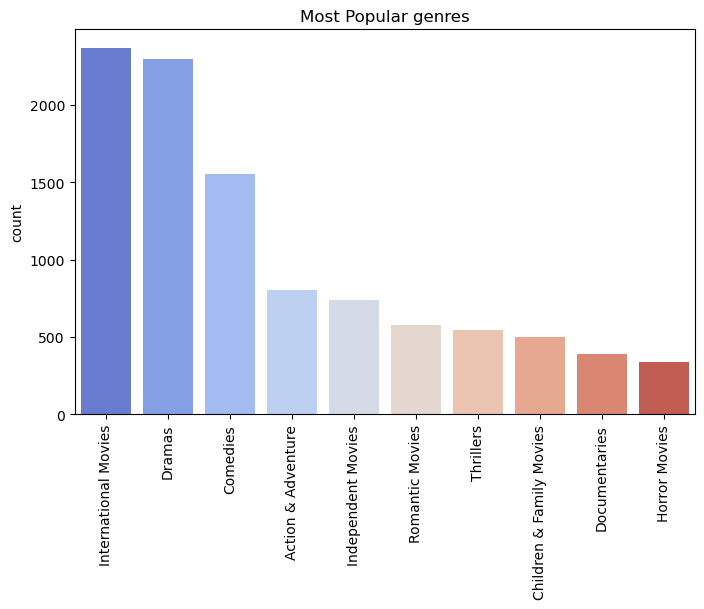

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_genre,palette='coolwarm')
plt.title("Most Popular genres")
plt.xticks(rotation=90)
plt.show()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/1572699664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


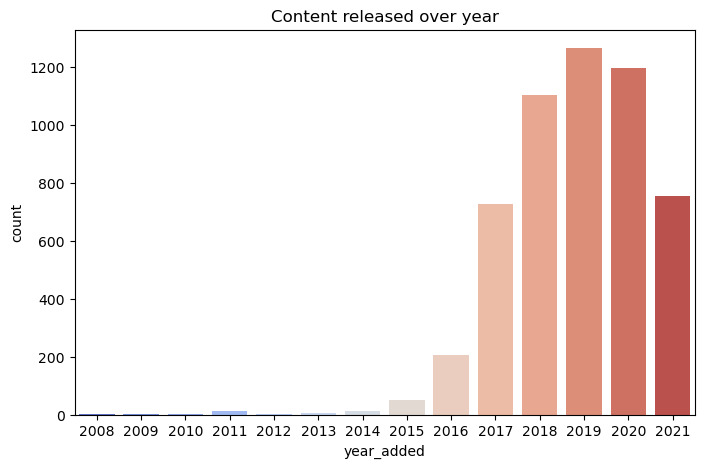

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title("Content released over year")
plt.show()

In [25]:
data['country'].value_counts().head(10)

country
United States     1849
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

In [26]:
top_10_country = data['country'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/1082547634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_country,palette='rainbow')


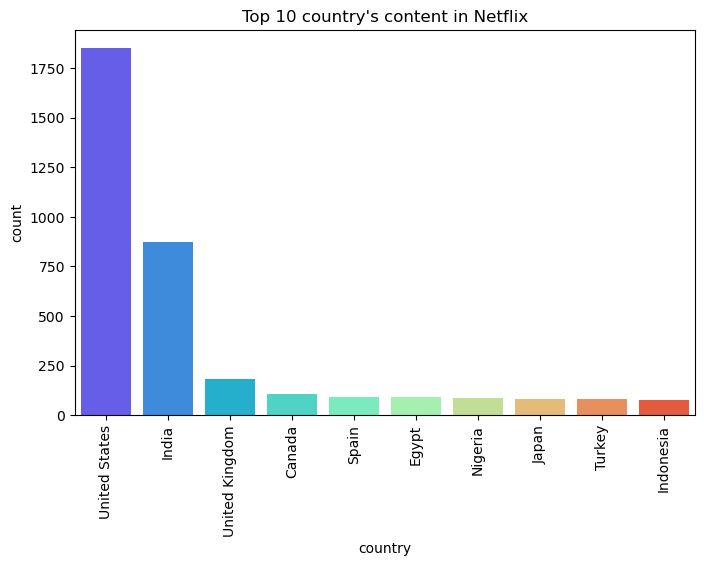

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_country,palette='rainbow')
plt.title("Top 10 country's content in Netflix")
plt.xticks(rotation=90)
plt.show()

In [28]:
year_counts = data['year_added'].value_counts().sort_index()

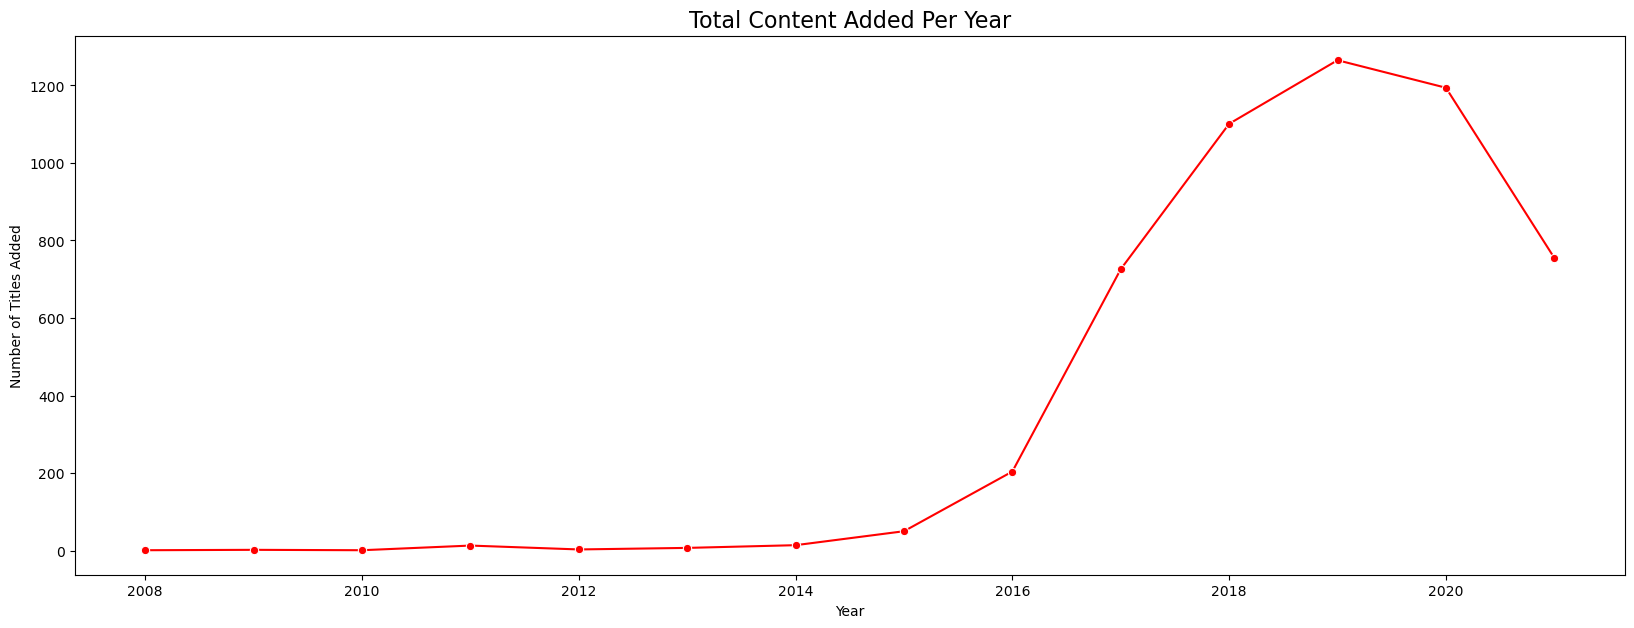

In [29]:
plt.figure(figsize=(20, 7))

year_counts = data['year_added'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o',color='r')
plt.title('Total Content Added Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

## User Demographics & Targeting

In [30]:
top_10_rating = data['rating'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/3283740672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_rating,palette='magma')


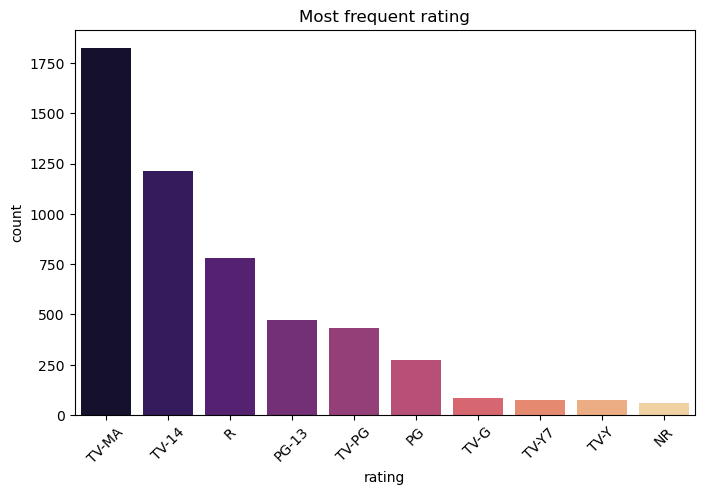

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_rating,palette='magma')
plt.title("Most frequent rating")
plt.xticks(rotation=45)
plt.show()

In [32]:
mature_content = data[data['rating'] == 'TV-MA']

In [33]:
mature_countries = mature_content['country'].str.split(', ').explode()

In [34]:
top_mature_countries = mature_countries.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/592894383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_mature_countries, palette='rocket')


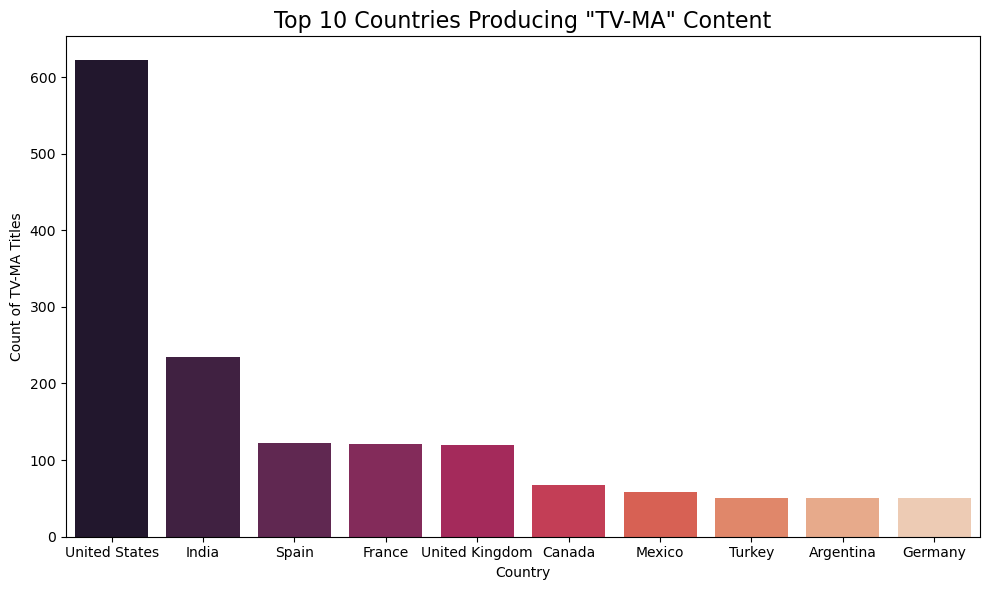

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(top_mature_countries, palette='rocket')
plt.title('Top 10 Countries Producing "TV-MA" Content', fontsize=16)
plt.ylabel('Count of TV-MA Titles')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [36]:
movies = data[data['type'] == 'Movie']
show = data[data['type'] == 'TV Show']

In [37]:
movie_genres = movies['genres'].explode()
top_10_movie_genres = movie_genres.value_counts().head(10)
show_genres = show['genres'].explode()
top_10_show_genres = show_genres.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/4202424965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_movie_genres, palette='Blues_r')
/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/4202424965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_show_genres, palette='Oranges_r')


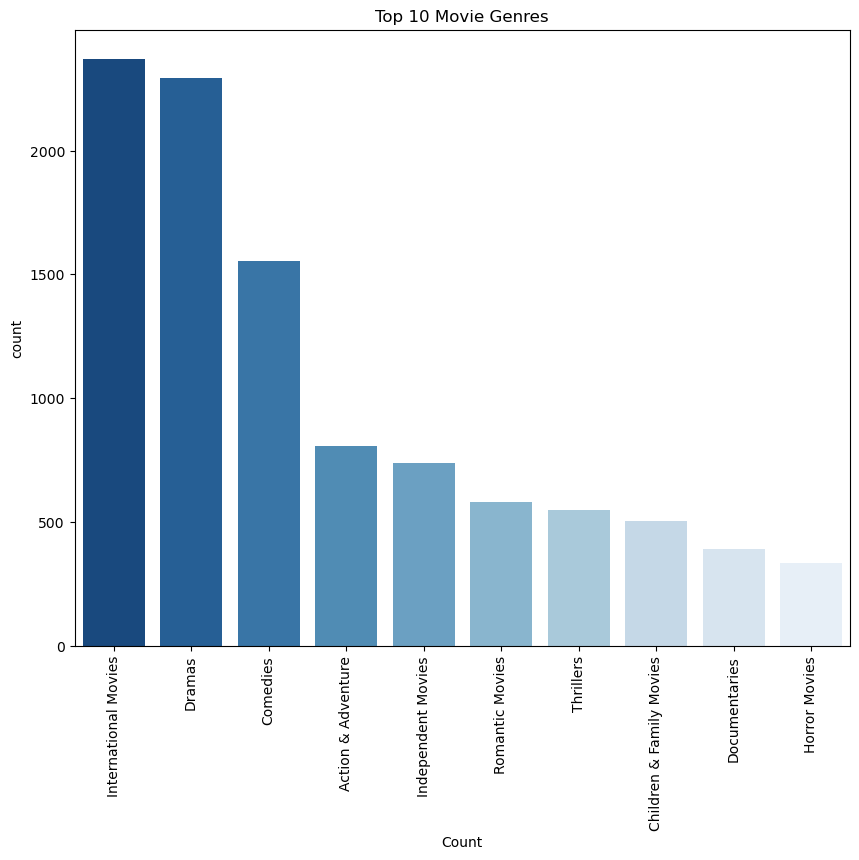

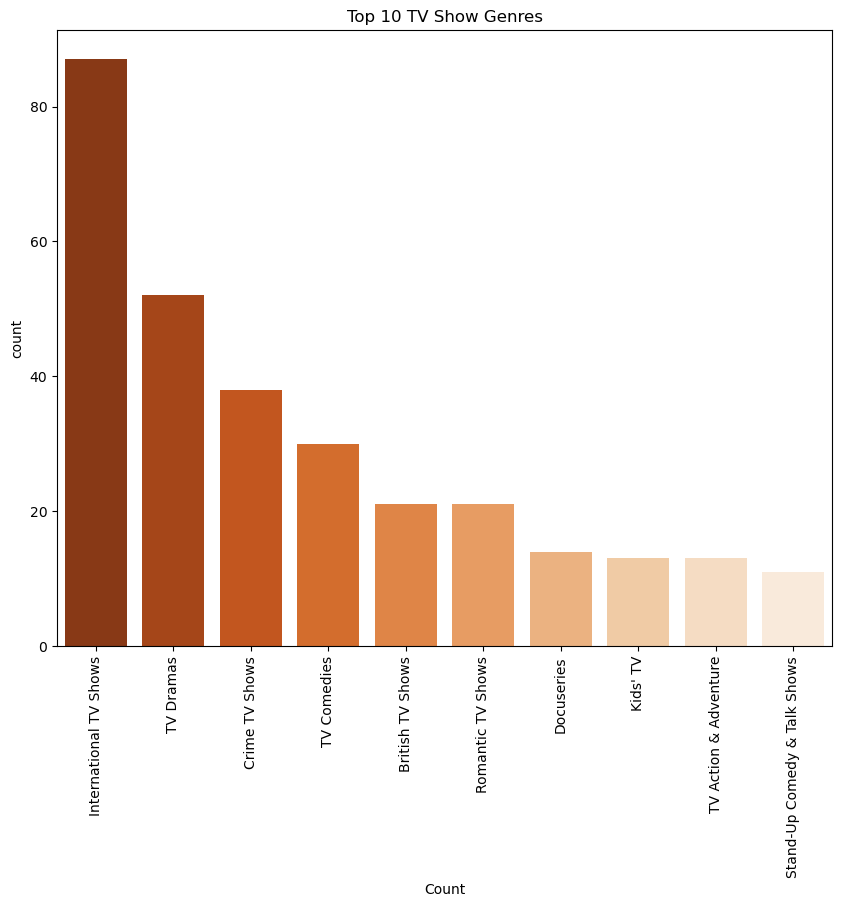

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(top_10_movie_genres, palette='Blues_r')
plt.title('Top 10 Movie Genres', fontsize=12)
plt.xlabel('Count')
plt.xticks(rotation=90)


plt.figure(figsize=(10, 8))
sns.barplot(top_10_show_genres, palette='Oranges_r')
plt.title('Top 10 TV Show Genres', fontsize=12)
plt.xlabel('Count')
plt.xticks(rotation=90)


plt.show()

In [39]:
us_data = data[data['country'].str.contains('United States')]
other_country_data = data[~data['country'].str.contains('United States')]

In [40]:
us_genres = us_data['genres'].explode().value_counts().head(10)
other_genres = other_country_data['genres'].explode().value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/2199287004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(us_genres, palette='cividis')
/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/2199287004.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(other_genres, palette='magma')


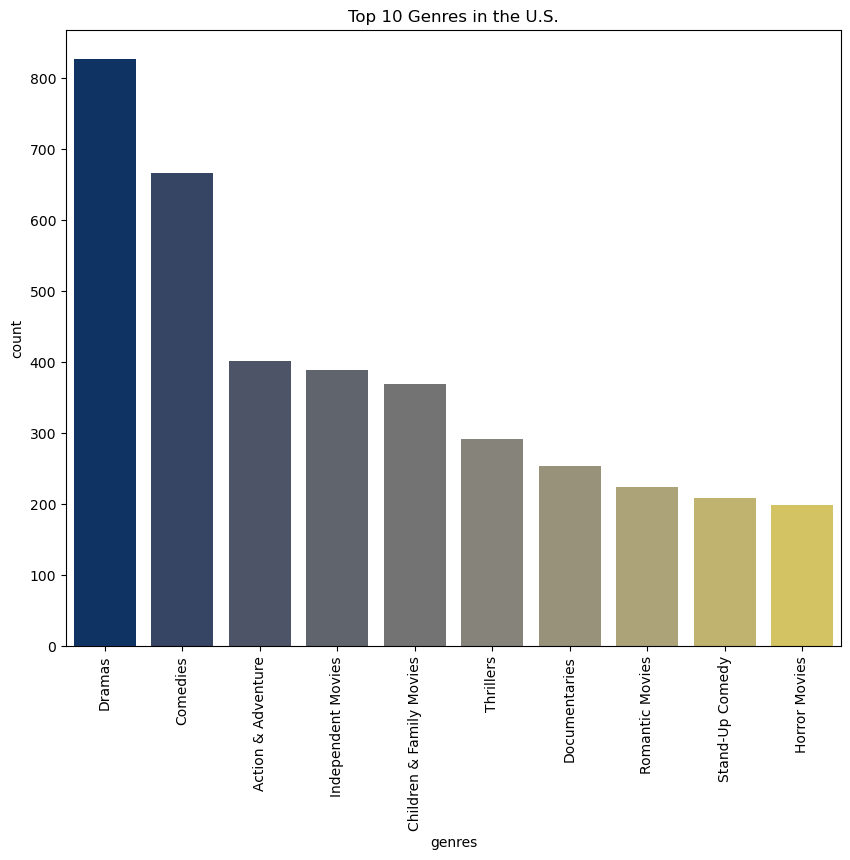

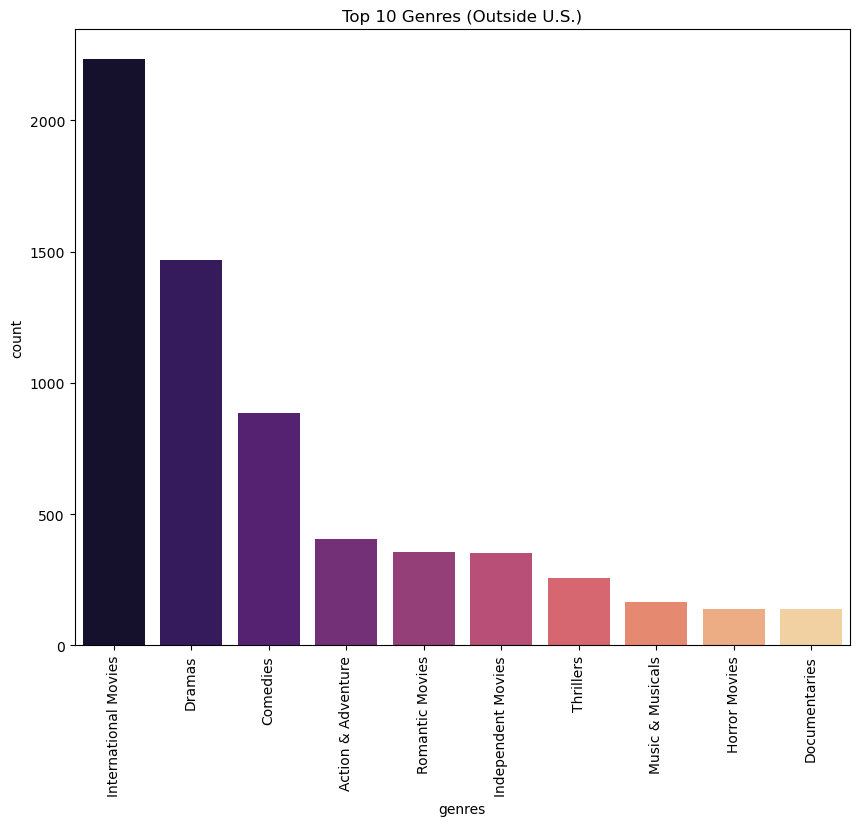

In [41]:
plt.figure(figsize=(10, 8))
sns.barplot(us_genres, palette='cividis')
plt.title('Top 10 Genres in the U.S.')
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
sns.barplot(other_genres, palette='magma')
plt.title('Top 10 Genres (Outside U.S.)')
plt.xticks(rotation=90)
plt.show()

In [42]:
ly = data['year_added'].max()
last3year_data = data[data['year_added'] >= (ly-2)]

In [43]:
genres_last3years = last3year_data['genres'].explode().value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/4269155871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(genres_last3years, palette='plasma')


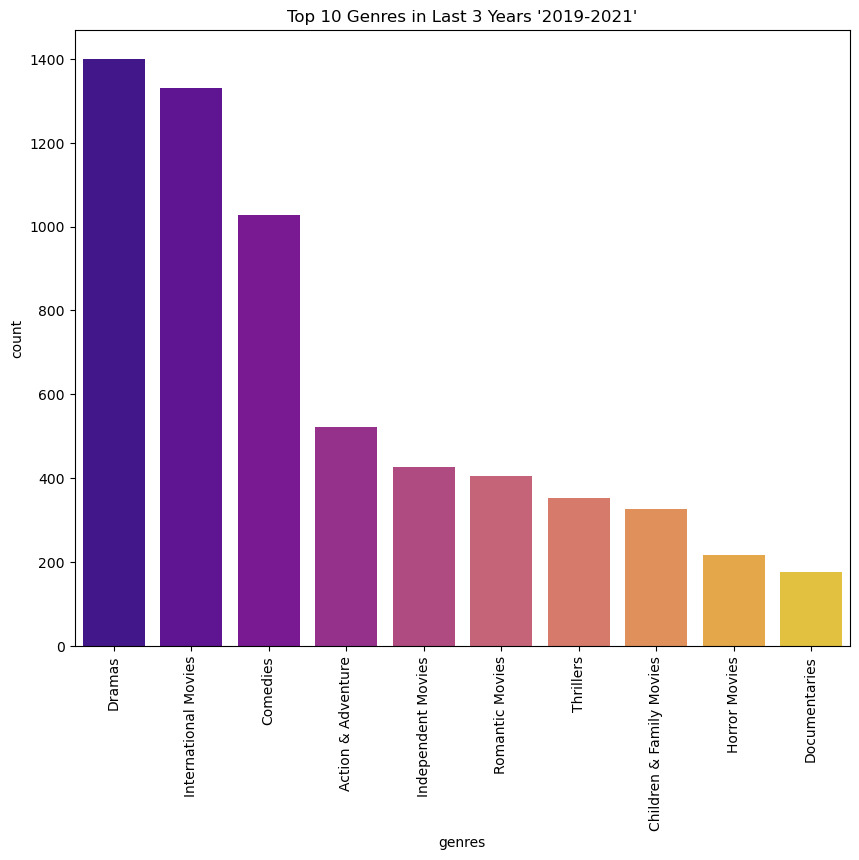

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(genres_last3years, palette='plasma')
plt.title(f"Top 10 Genres in Last 3 Years '{int(ly-2)}-{ly}'")
plt.xticks(rotation=90)
plt.show()

## Talent Acquisition & Partnerships

In [45]:
top_director = data['director'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/153428102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_director,palette='viridis')


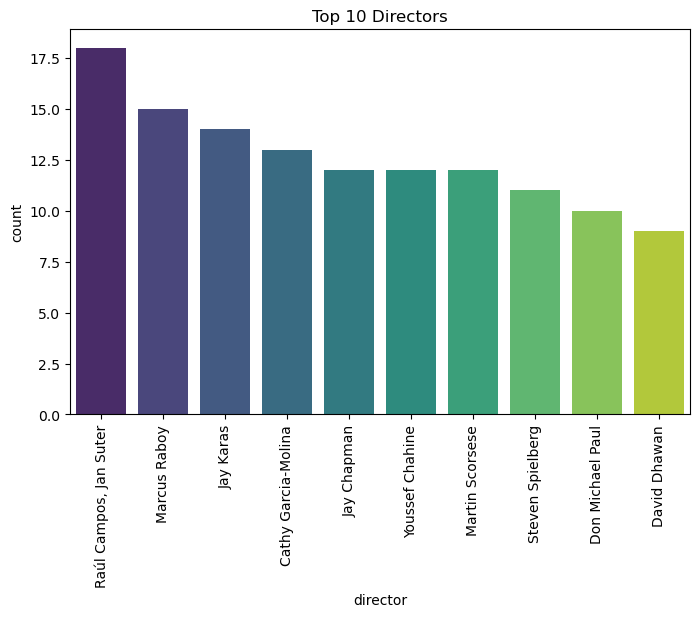

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(top_director,palette='viridis')
plt.title("Top 10 Directors")
plt.xticks(rotation=90)
plt.show()

In [47]:
all_cast = data['cast'].str.split(', ').explode()
top_10_actor = all_cast.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/2733191044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_actor,palette='cubehelix')


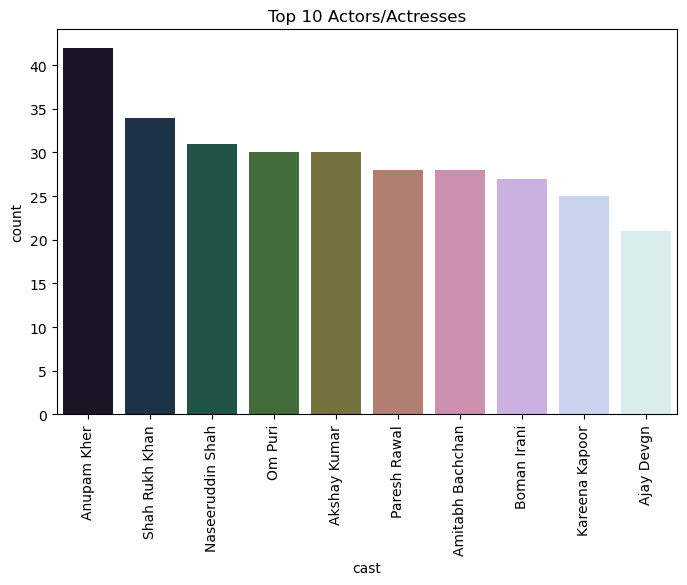

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_actor,palette='cubehelix')
plt.title("Top 10 Actors/Actresses")
plt.xticks(rotation=90)
plt.show()

In [49]:
direct_genre = data[['director','genres']]
direct_genre = direct_genre.assign(genres=direct_genre['genres']).explode('genres')
direct_genre = direct_genre.assign(director=direct_genre['director'].str.split(', ')).explode('director')

In [50]:
direct_genre.groupby(['director', 'genres']).size().nlargest(10).reset_index(name='count')

,director,genres,count
0,Jan Suter,Stand-Up Comedy,21
1,Raúl Campos,Stand-Up Comedy,19
2,Jay Karas,Stand-Up Comedy,14
3,Marcus Raboy,Stand-Up Comedy,14
4,Cathy Garcia-Molina,International Movies,13
5,Jay Chapman,Stand-Up Comedy,12
6,Youssef Chahine,Dramas,12
7,Youssef Chahine,International Movies,10
8,Cathy Garcia-Molina,Dramas,9
9,David Dhawan,Comedies,9


In [51]:
pair_counts = direct_genre.groupby(['director', 'genres']).size().nlargest(10)
pair_counts_df = pair_counts.reset_index(name='count')
pair_counts_df['pair']=pair_counts_df['director'] + " - " + pair_counts_df['genres']

In [52]:
pair_counts_df

,director,genres,count,pair
0,Jan Suter,Stand-Up Comedy,21,Jan Suter - Stand-Up Comedy
1,Raúl Campos,Stand-Up Comedy,19,Raúl Campos - Stand-Up Comedy
2,Jay Karas,Stand-Up Comedy,14,Jay Karas - Stand-Up Comedy
3,Marcus Raboy,Stand-Up Comedy,14,Marcus Raboy - Stand-Up Comedy
4,Cathy Garcia-Molina,International Movies,13,Cathy Garcia-Molina - International Movies
5,Jay Chapman,Stand-Up Comedy,12,Jay Chapman - Stand-Up Comedy
6,Youssef Chahine,Dramas,12,Youssef Chahine - Dramas
7,Youssef Chahine,International Movies,10,Youssef Chahine - International Movies
8,Cathy Garcia-Molina,Dramas,9,Cathy Garcia-Molina - Dramas
9,David Dhawan,Comedies,9,David Dhawan - Comedies


/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/2565140505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pair_counts_df, x='count', y='pair', palette='cubehelix')


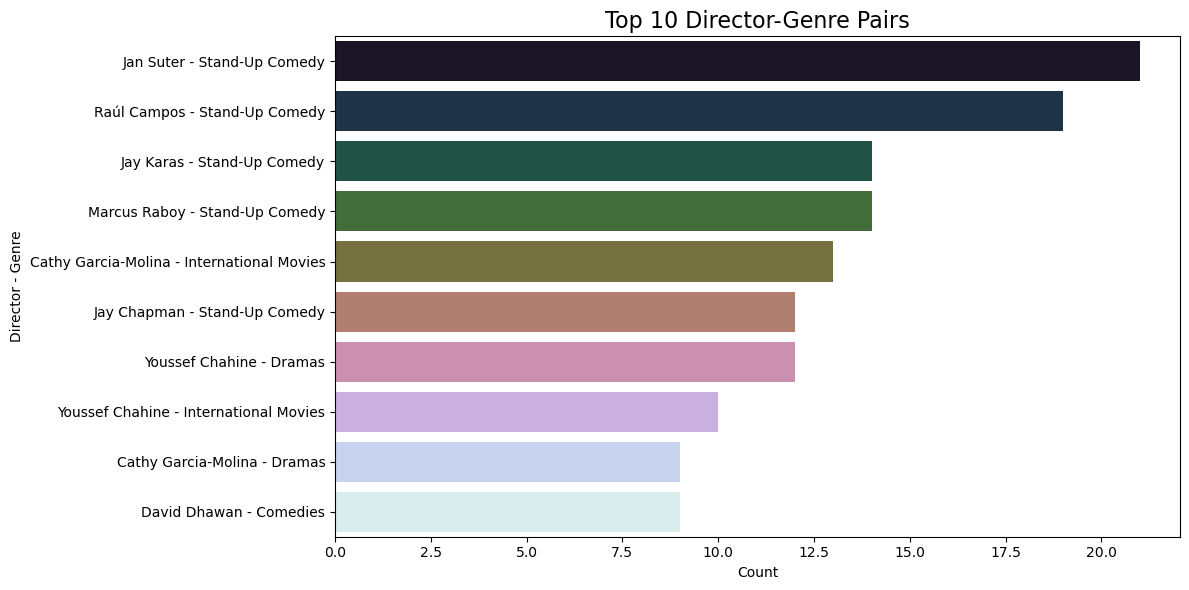

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pair_counts_df, x='count', y='pair', palette='cubehelix')
plt.title('Top 10 Director-Genre Pairs', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Director - Genre')
plt.tight_layout()
plt.show()

## Duration & Engagement

In [54]:
Movie_durations = data[data['type'] == 'Movie']['duration']
Avg_time = Movie_durations.str.split(" ").str[0].astype(int).mean()
print(f"The average duration of movies on Netflix is {Avg_time:.2f} minutes.")

The average duration of movies on Netflix is 102.70 minutes.


In [55]:
Show_durations = data[data['type'] == 'TV Show']['duration']
Avg_time = Show_durations.str.split(" ").str[0].astype(int).mean()
print(f"The average duration of TV shows on Netflix is {Avg_time:.1f} seasons.")

The average duration of TV shows on Netflix is 1.9 seasons.


In [56]:
movies = data[(data['type'] == 'Movie') & (data['release_year'] >= 1980)]
movies['duration'] = movies['duration'].str.split(" ").str[0].astype(int)
avg_duration_by_year = movies.groupby('release_year')['duration'].mean()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/3266459499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split(" ").str[0].astype(int)


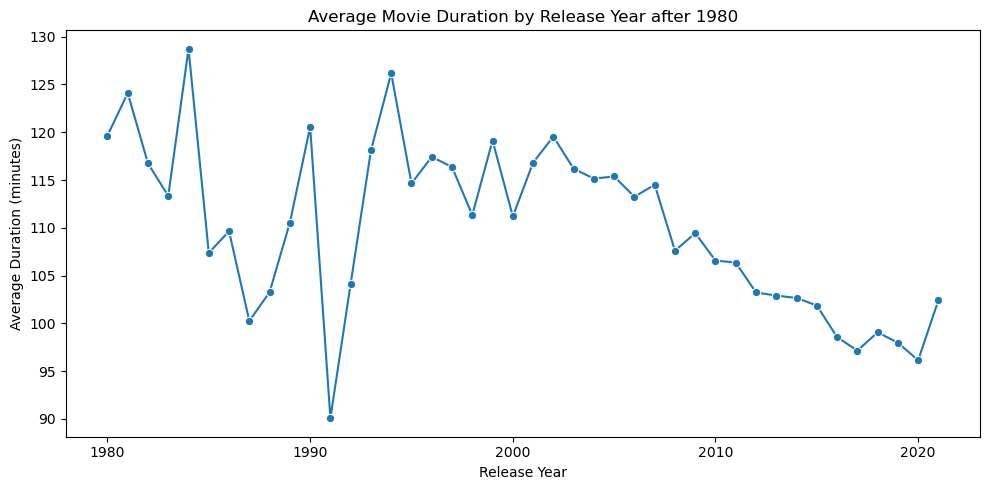

In [57]:
plt.figure(figsize=(10, 5))
sns.lineplot(avg_duration_by_year, marker='o')
plt.title('Average Movie Duration by Release Year after 1980')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()

In [58]:
shows = data[(data['type'] == 'TV Show') & (data['release_year'] >= 1980)]
shows['duration'] = shows['duration'].str.split(" ").str[0].astype(int)
shows_avg_duration_by_year = shows.groupby('release_year')['duration'].mean()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/193684868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['duration'] = shows['duration'].str.split(" ").str[0].astype(int)


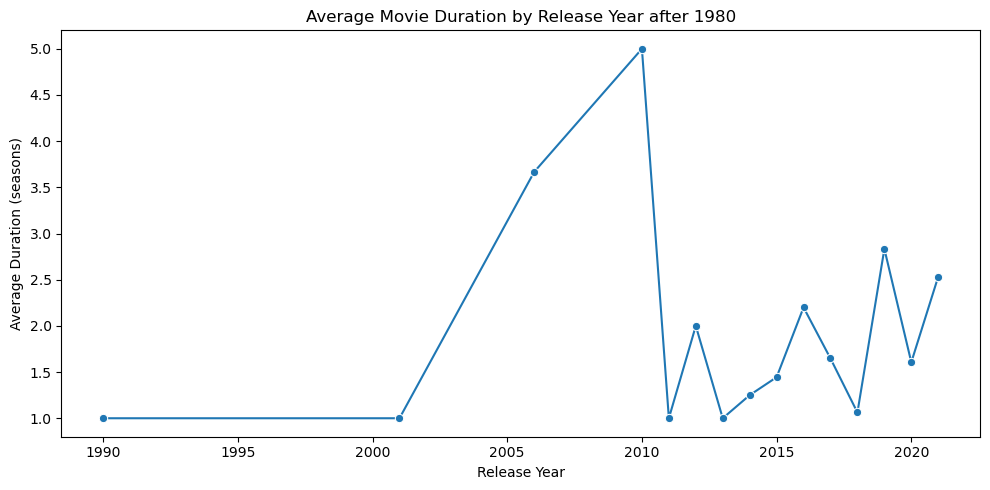

In [68]:
plt.figure(figsize=(10, 5))
sns.lineplot(shows_avg_duration_by_year, marker='o')
plt.title('Average Movie Duration by Release Year after 1980')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (seasons)')
plt.tight_layout()
plt.show()

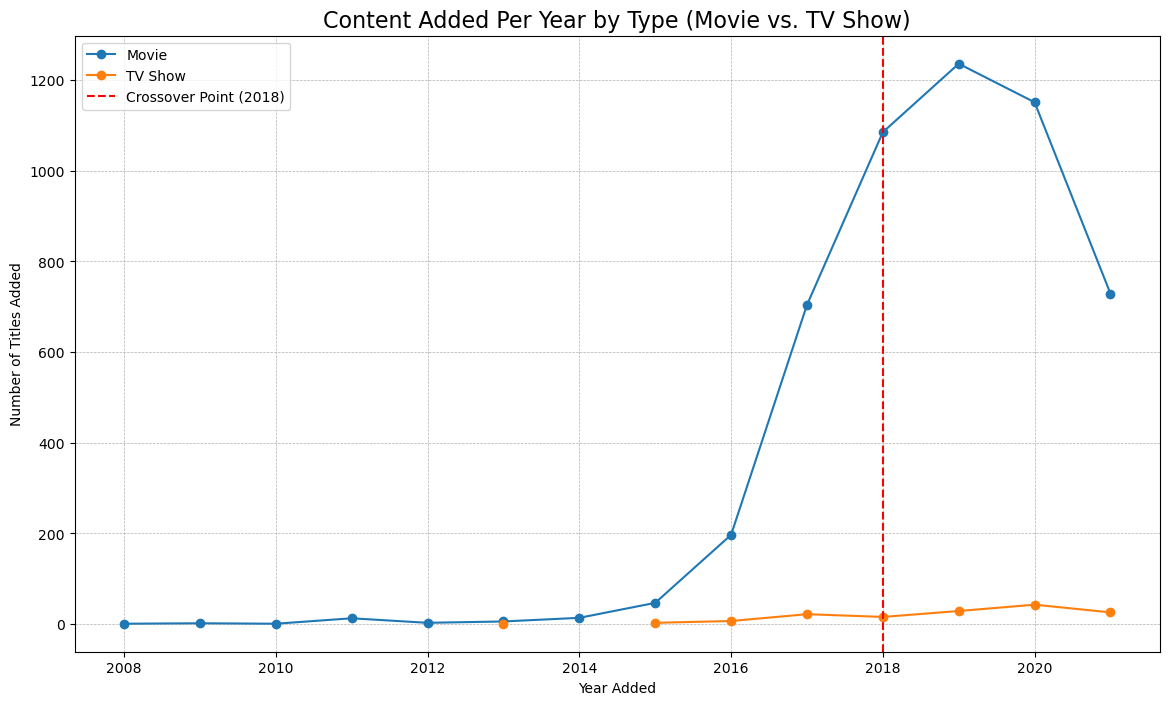

In [ ]:
content_trends_by_type = data.groupby(['year_added', 'type']).size().unstack()

content_trends_by_type = content_trends_by_type.loc[content_trends_by_type.index >= 2008]

content_trends_by_type.plot(
    kind='line', 
    marker='o',
    figsize=(14, 8)
)

plt.title('Content Added Per Year by Type (Movie vs. TV Show)', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.axvline(2018, color='red', linestyle='--', label='Crossover Point (2018)')
plt.legend()

plt.show()

## Content Launch Strategy

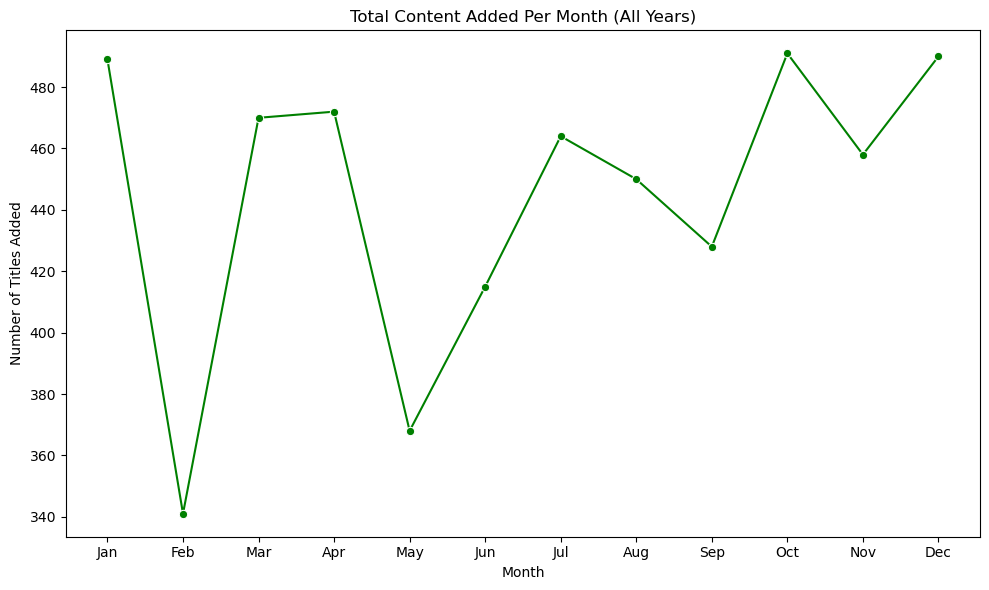

In [60]:
month_counts = data['month_added'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o',color='g')
plt.title('Total Content Added Per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(1, 13), labels=month_labels)

plt.tight_layout()
plt.show()

In [61]:
genre_year_df = data.assign(genre=data['listed_in'].str.split(', ')).explode('genre')

top_5_genres = genre_year_df['genre'].value_counts().head(5).index.tolist()

genre_year_top5 = genre_year_df[genre_year_df['genre'].isin(top_5_genres)]

genre_year_top5 = genre_year_top5[genre_year_top5['year_added'] >= 2015]

genre_trends = genre_year_top5.groupby(['year_added', 'genre']).size().unstack().fillna(0)

<Figure size 1200x800 with 0 Axes>

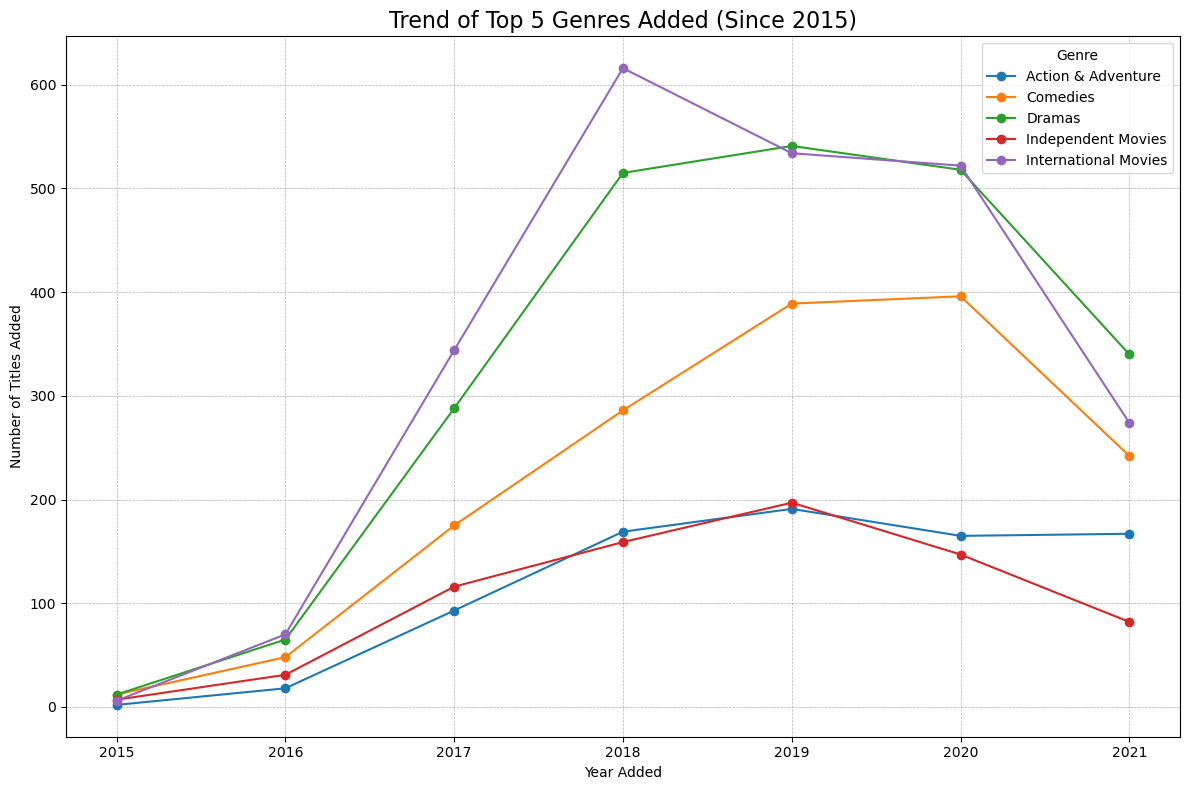

In [62]:
plt.figure(figsize=(12, 8))
genre_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Top 5 Genres Added (Since 2015)', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Genre')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [63]:
data['genres'].value_counts().head(10)

genres
[Dramas, International Movies]                        336
[Stand-Up Comedy]                                     286
[Comedies, Dramas, International Movies]              257
[Dramas, Independent Movies, International Movies]    243
[Children & Family Movies, Comedies]                  179
[Dramas, International Movies, Romantic Movies]       160
[Documentaries]                                       156
[Comedies, International Movies]                      152
[Comedies, International Movies, Romantic Movies]     143
[Dramas]                                              134
Name: count, dtype: int64

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


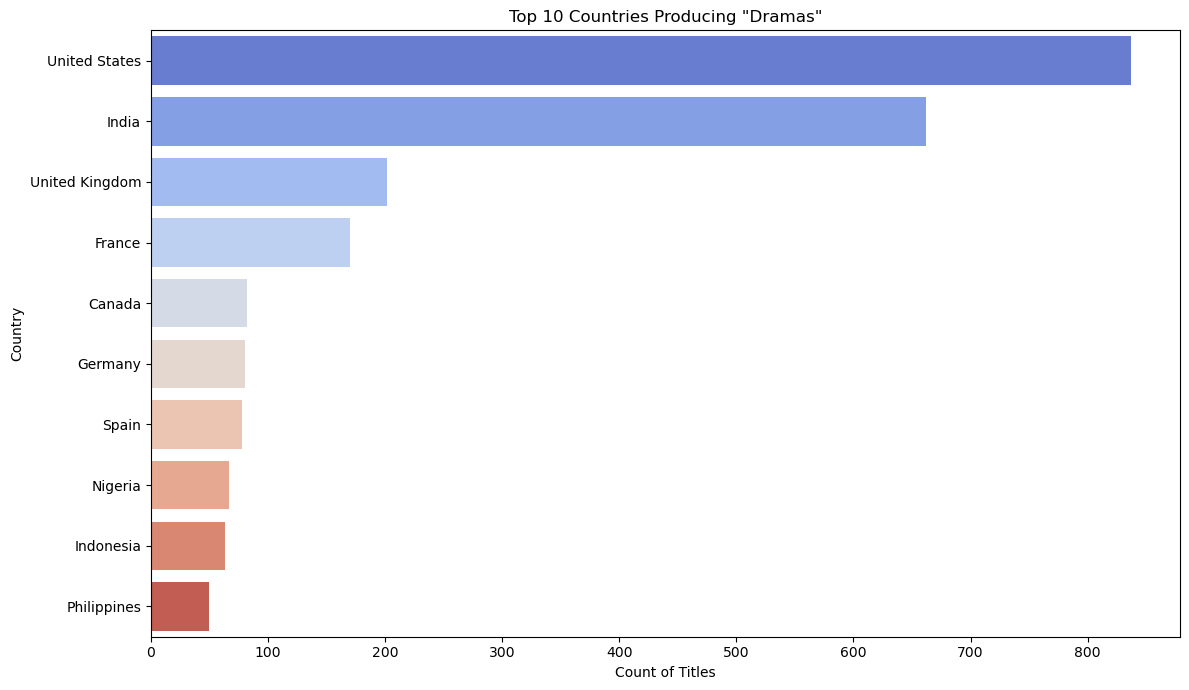

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


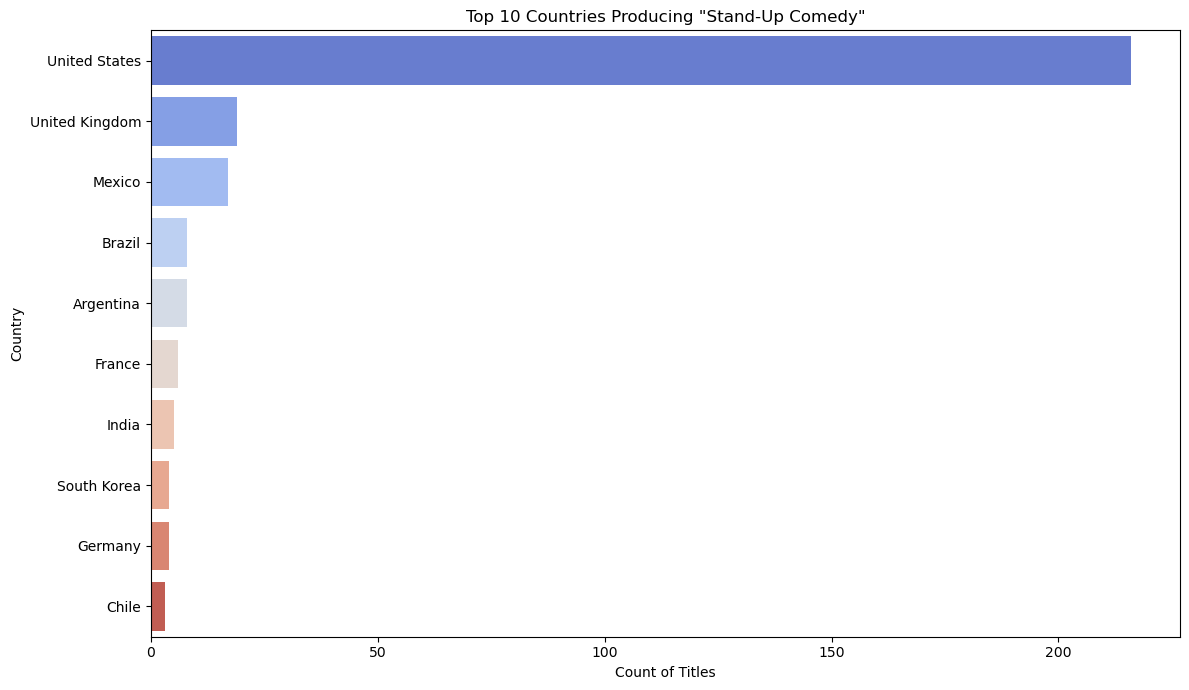

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


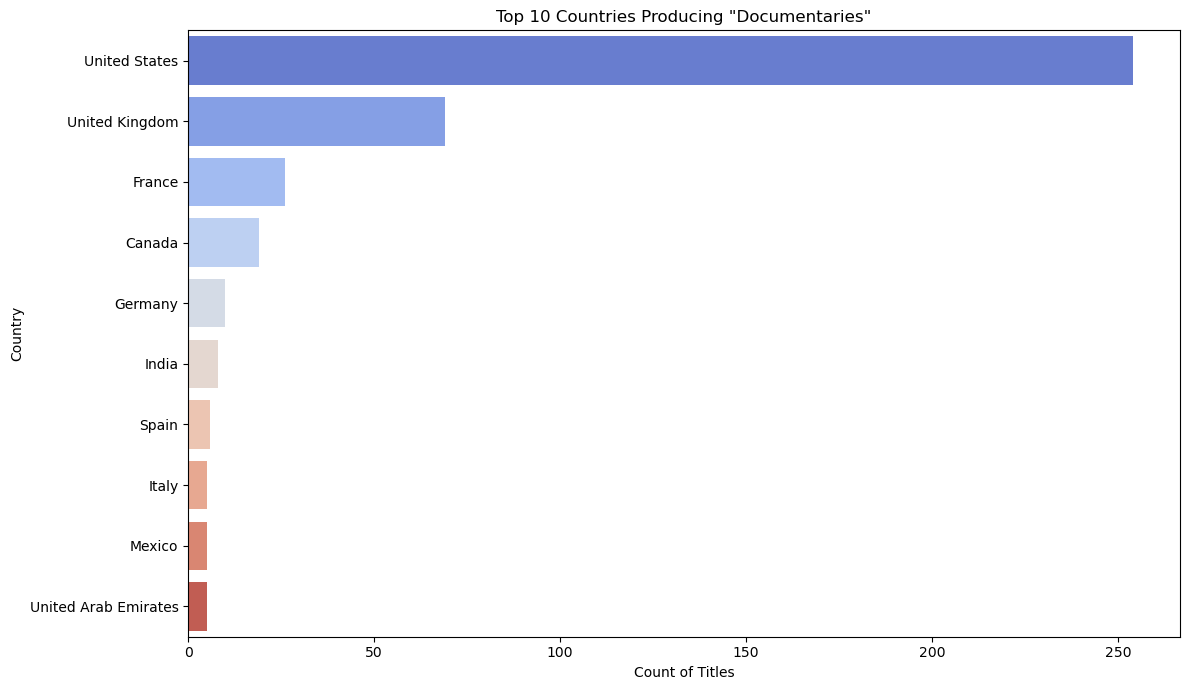

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


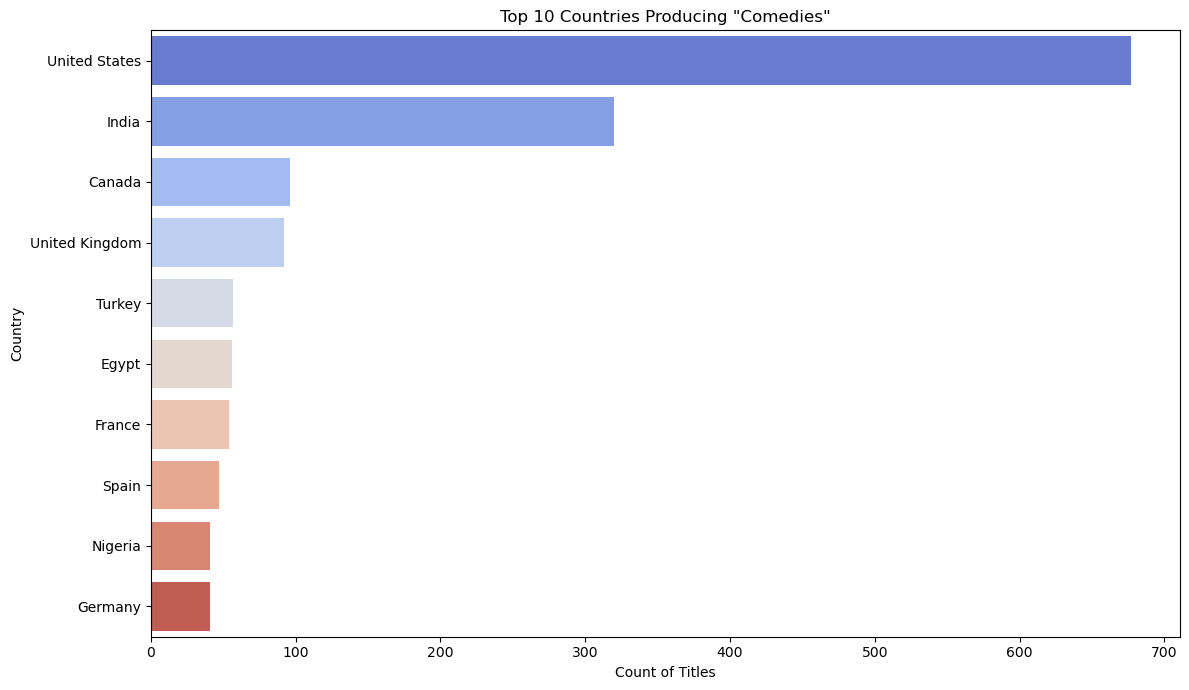

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


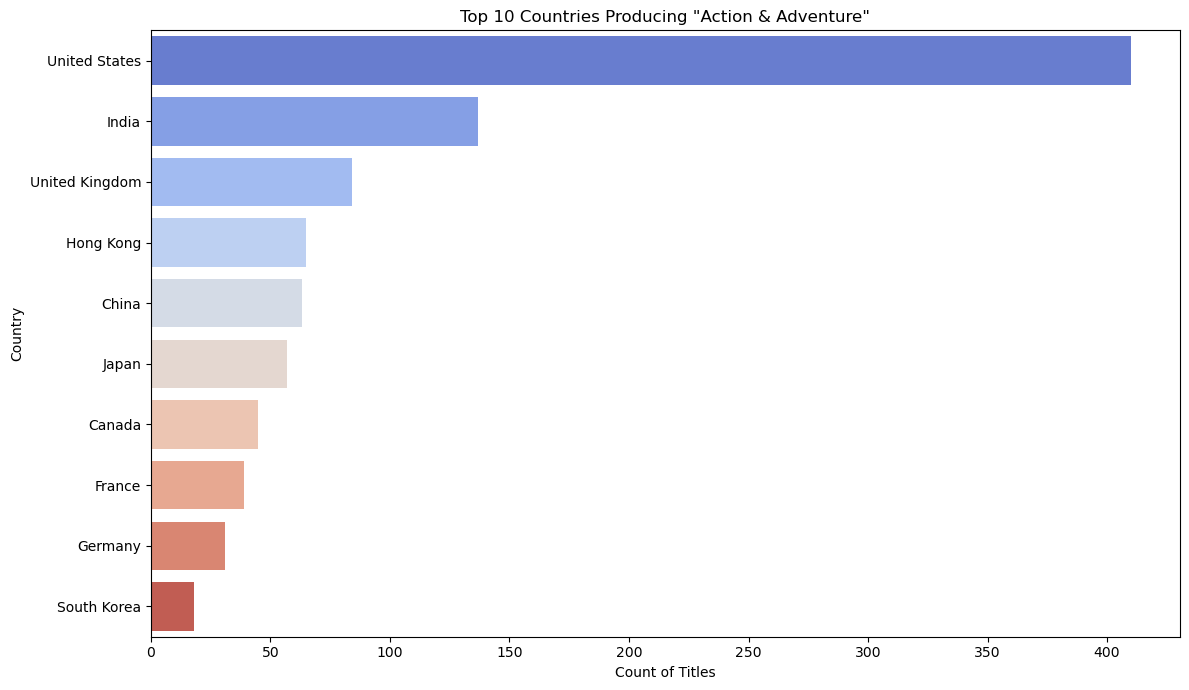

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


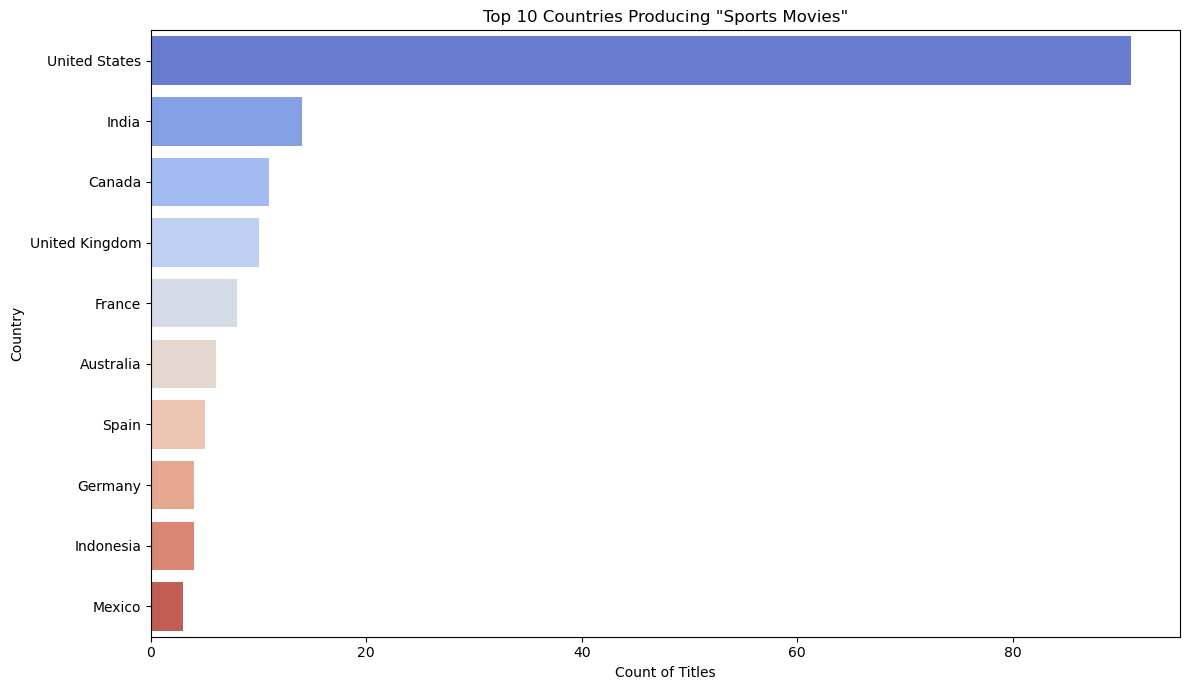

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


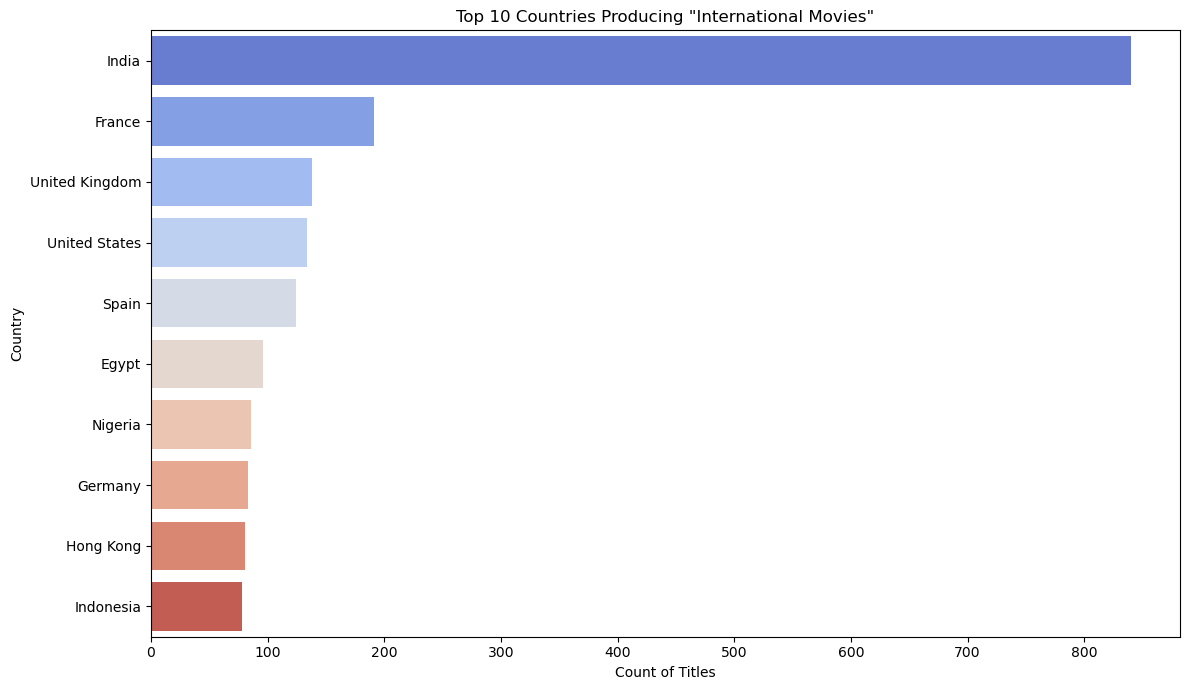

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


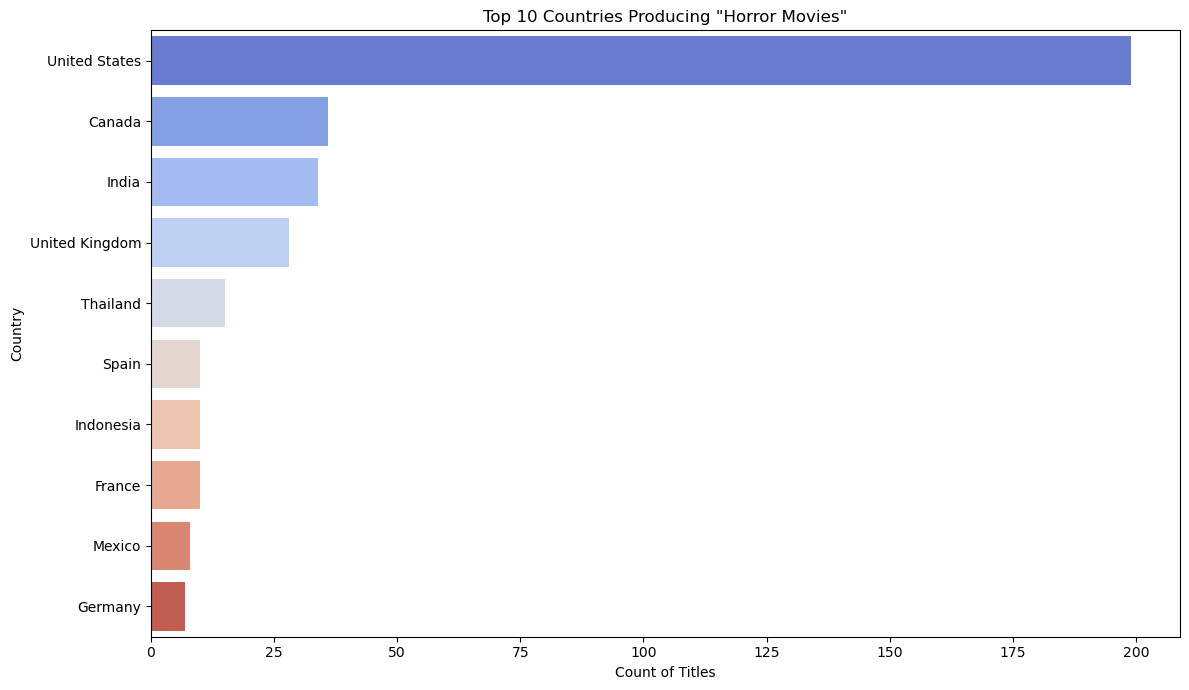

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


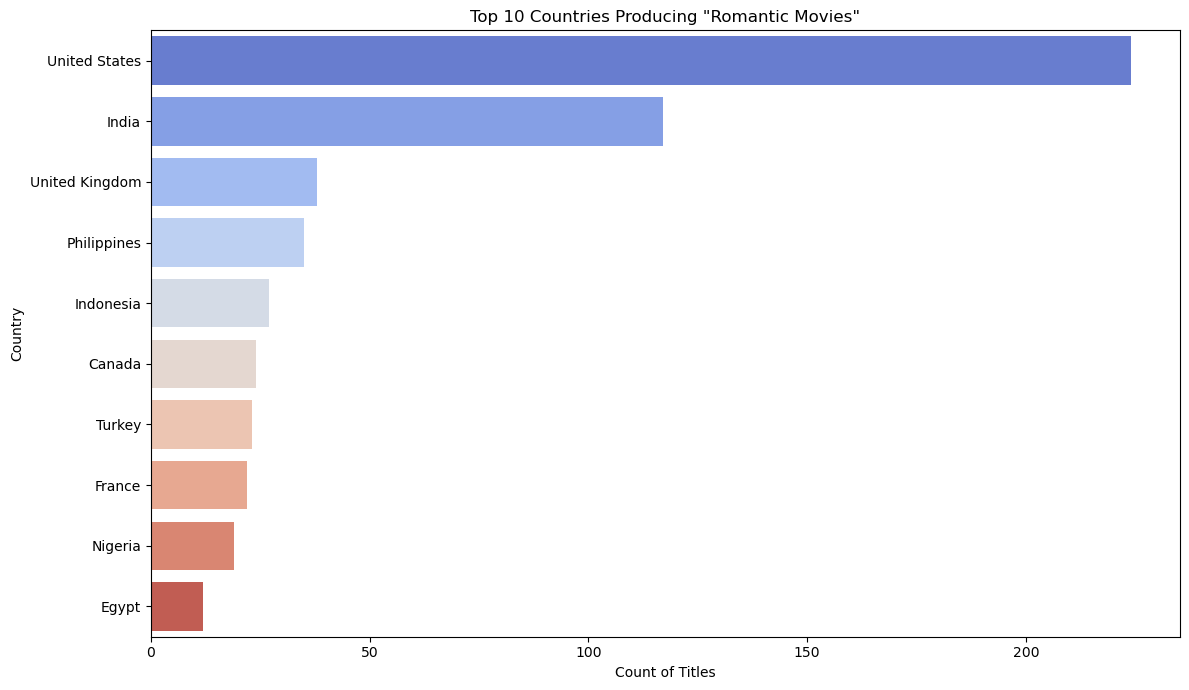

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_17758/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


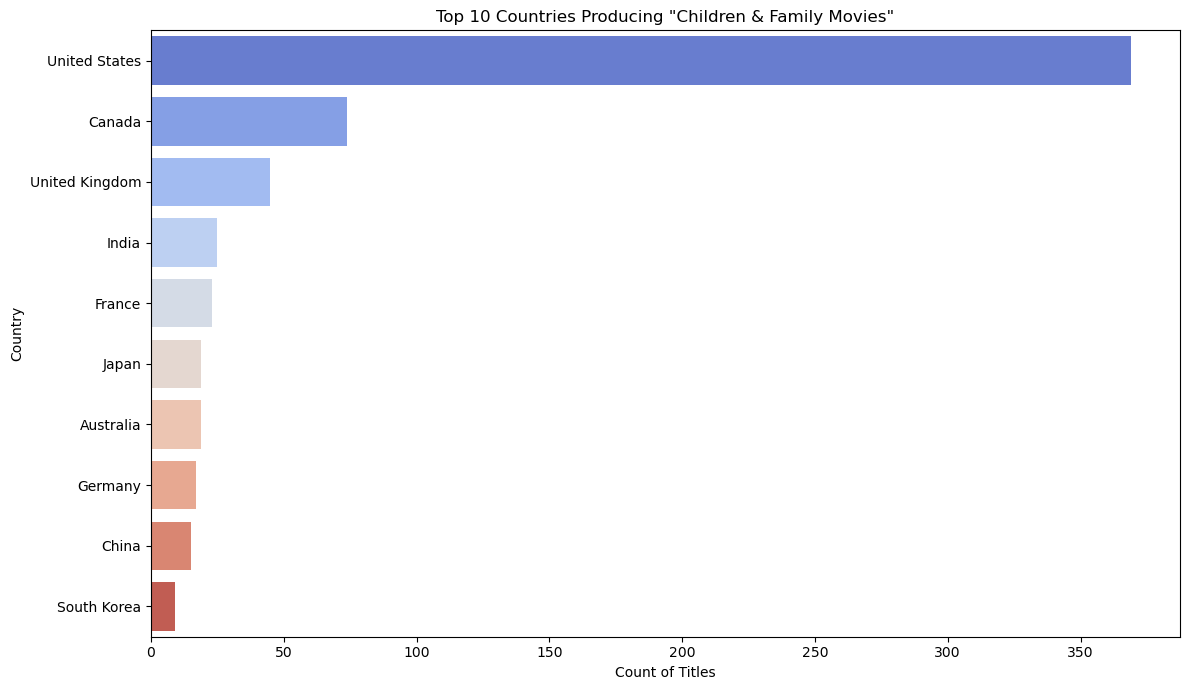

In [64]:
genre_to_check = ['Dramas','Stand-Up Comedy','Documentaries','Comedies','Action & Adventure','Sports Movies','International Movies','Horror Movies','Romantic Movies','Children & Family Movies']
for i in genre_to_check:
    df = data[data['listed_in'].str.contains(i)]
    countries = df['country'].str.split(', ').explode()
    top_countries = countries.value_counts().head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
    plt.title(f'Top 10 Countries Producing "{i}"')
    plt.xlabel('Count of Titles')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

# Word Cloud

In [65]:
movie_titles = data[data['type'] == 'Movie']['title']

In [66]:
wordcloud = WordCloud(width=1400, height=900).generate(" ".join(movie_titles))

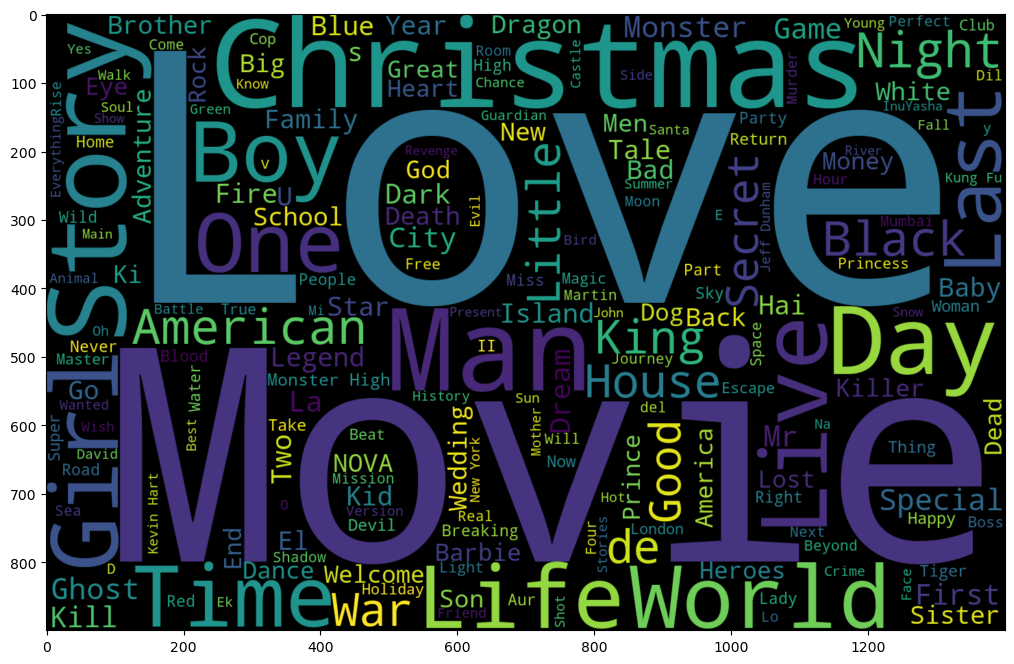

In [67]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Insights

Executive Summary: Key Insights & Recommendations
Our analysis reveals a clear and decisive shift in content strategy. While Netflix's historical library is dominated by movies, its recent focus (since 2018) has pivoted dramatically toward producing and acquiring TV Shows. The platform's growth is fueled by international content, yet the vast majority of TV shows are limited to a single season.

To grow the business, we recommend:

Prioritize TV Show Production: Shift the budget focus from acquiring licensed movies to producing original TV shows. This is the clear growth driver.

Embrace the "Global & Local" Model: The US market is saturated. The largest opportunity is in non-US markets. Instead of generic "international" content, focus on producing content for specific, high-growth markets (e.g., India, South Korea, Japan) using local directors and actors.

Optimize the Launch Calendar: Concentrate major new show launches in the "primetime" window of October through January. This aligns with existing user behavior and maximizes visibility.

Adopt a "Limited Series" Strategy: Since the vast majority of TV shows do not get a second season, we should formalize this. By prioritizing high-impact, single-season "Limited Series," we can lower financial risk, attract top-tier talent for short commitments, and maintain a constantly fresh content pipeline.

Part 1: The Strategic Shift: TV Shows vs. Movies (Q-ii, Q-v)
Q: Does Netflix focus more on TV Shows or Movies?

Finding: While movies make up the majority of the total library (approx. 70% vs 30% for TV Shows), this is a historical view. The current strategy is the opposite.

The plot content_trends_by_type.png is the most important chart in this analysis. It shows that in 2018, there was a "crossover." For the first time, the number of new TV shows added to the platform nearly equaled the number of new movies. Since then, movie additions have plummeted while TV show additions have continued to climb, even with a slight post-pandemic dip.

Conclusion: Netflix is no longer a movie-first platform. It is a TV Show-first platform. This directly addresses Q(v) and Q(ii).

Part 2: Global Content Landscape (Q-i, Q-vi)
Q: What content is available in different countries?

Q: How has the number of movies released per year changed?

Finding: The United States dominates production, accounting for more titles than the next nine countries combined (top_countries.png). However, "International Movies" is the single most popular genre on the platform (top_genres.png), with India being the #2 content-producing country.

When comparing markets (top_genres_us_vs_non_us.png):

US Market: Saturated with "Dramas" and "Documentaries."

Non-US Market: Dominated by "International Movies" and "Dramas."

Regarding Q(i), the content_trends_by_type.png plot shows that the number of movies added to Netflix has sharply decreased since its peak in 2018.

Conclusion: The US is a mature market. The clear opportunity for growth is international. We must move beyond just acquiring "International Movies" and begin to dominate the "International TV Show" space.

Part 3: Launch & Engagement Strategy (Q-iii)
Q: What is the best time to launch a TV show?

Finding: The data is unambiguous. Our analysis of all content added (content_trends_year_month.png) shows a massive spike in new titles landing on the platform from October through January.

This indicates Netflix strategically concentrates its biggest launches during the Q4 holiday season and the "New Year, New You" period in Q1.

Conclusion: We should align all major new TV show launches with this existing "primetime" window to capitalize on existing user habits and marketing momentum.

Part 4: Talent & Production Analysis (Q-iv)
Q: What does the data show about actors and directors?

Finding: Our talent analysis reveals two key insights:

Niche Dominance: The top directors (e.g., Rajiv Chilaka) are often not Hollywood A-listers but creators who dominate a specific, high-volume niche like "Kids' TV" (top_directors.png).

Local Legends: The most frequent actors (e.g., Anupam Kher, Shah Rukh Khan from top_actors.png) are often those prolific in a specific, high-growth market like India.

The 1-Season Reality: The single most common duration for a TV show on Netflix is 1 Season (show_seasons.png). This suggests a high churn rate and a low rate of renewal.

Conclusion: We should formalize the "1-Season Reality." This reinforces the recommendation to focus on Limited Series. This model allows us to partner with prolific local directors and actors for a single, high-impact project, creating authentic content for target markets without the long-term financial risk of a multi-season show.